In [1]:
import sys
sys.path.insert(0,'..')

from sktime_analysis import *

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sktime.classification.compose import (
    ColumnEnsembleClassifier,
    TimeSeriesForestClassifier
)
from sktime.transformers.panel.compose import ColumnConcatenator

Column Concatenation Score: 0.8365853658536585
Column Ensemble Score: 0.9585365853658537


Text(0.5, 1.0, 'Feature Importance Curve')

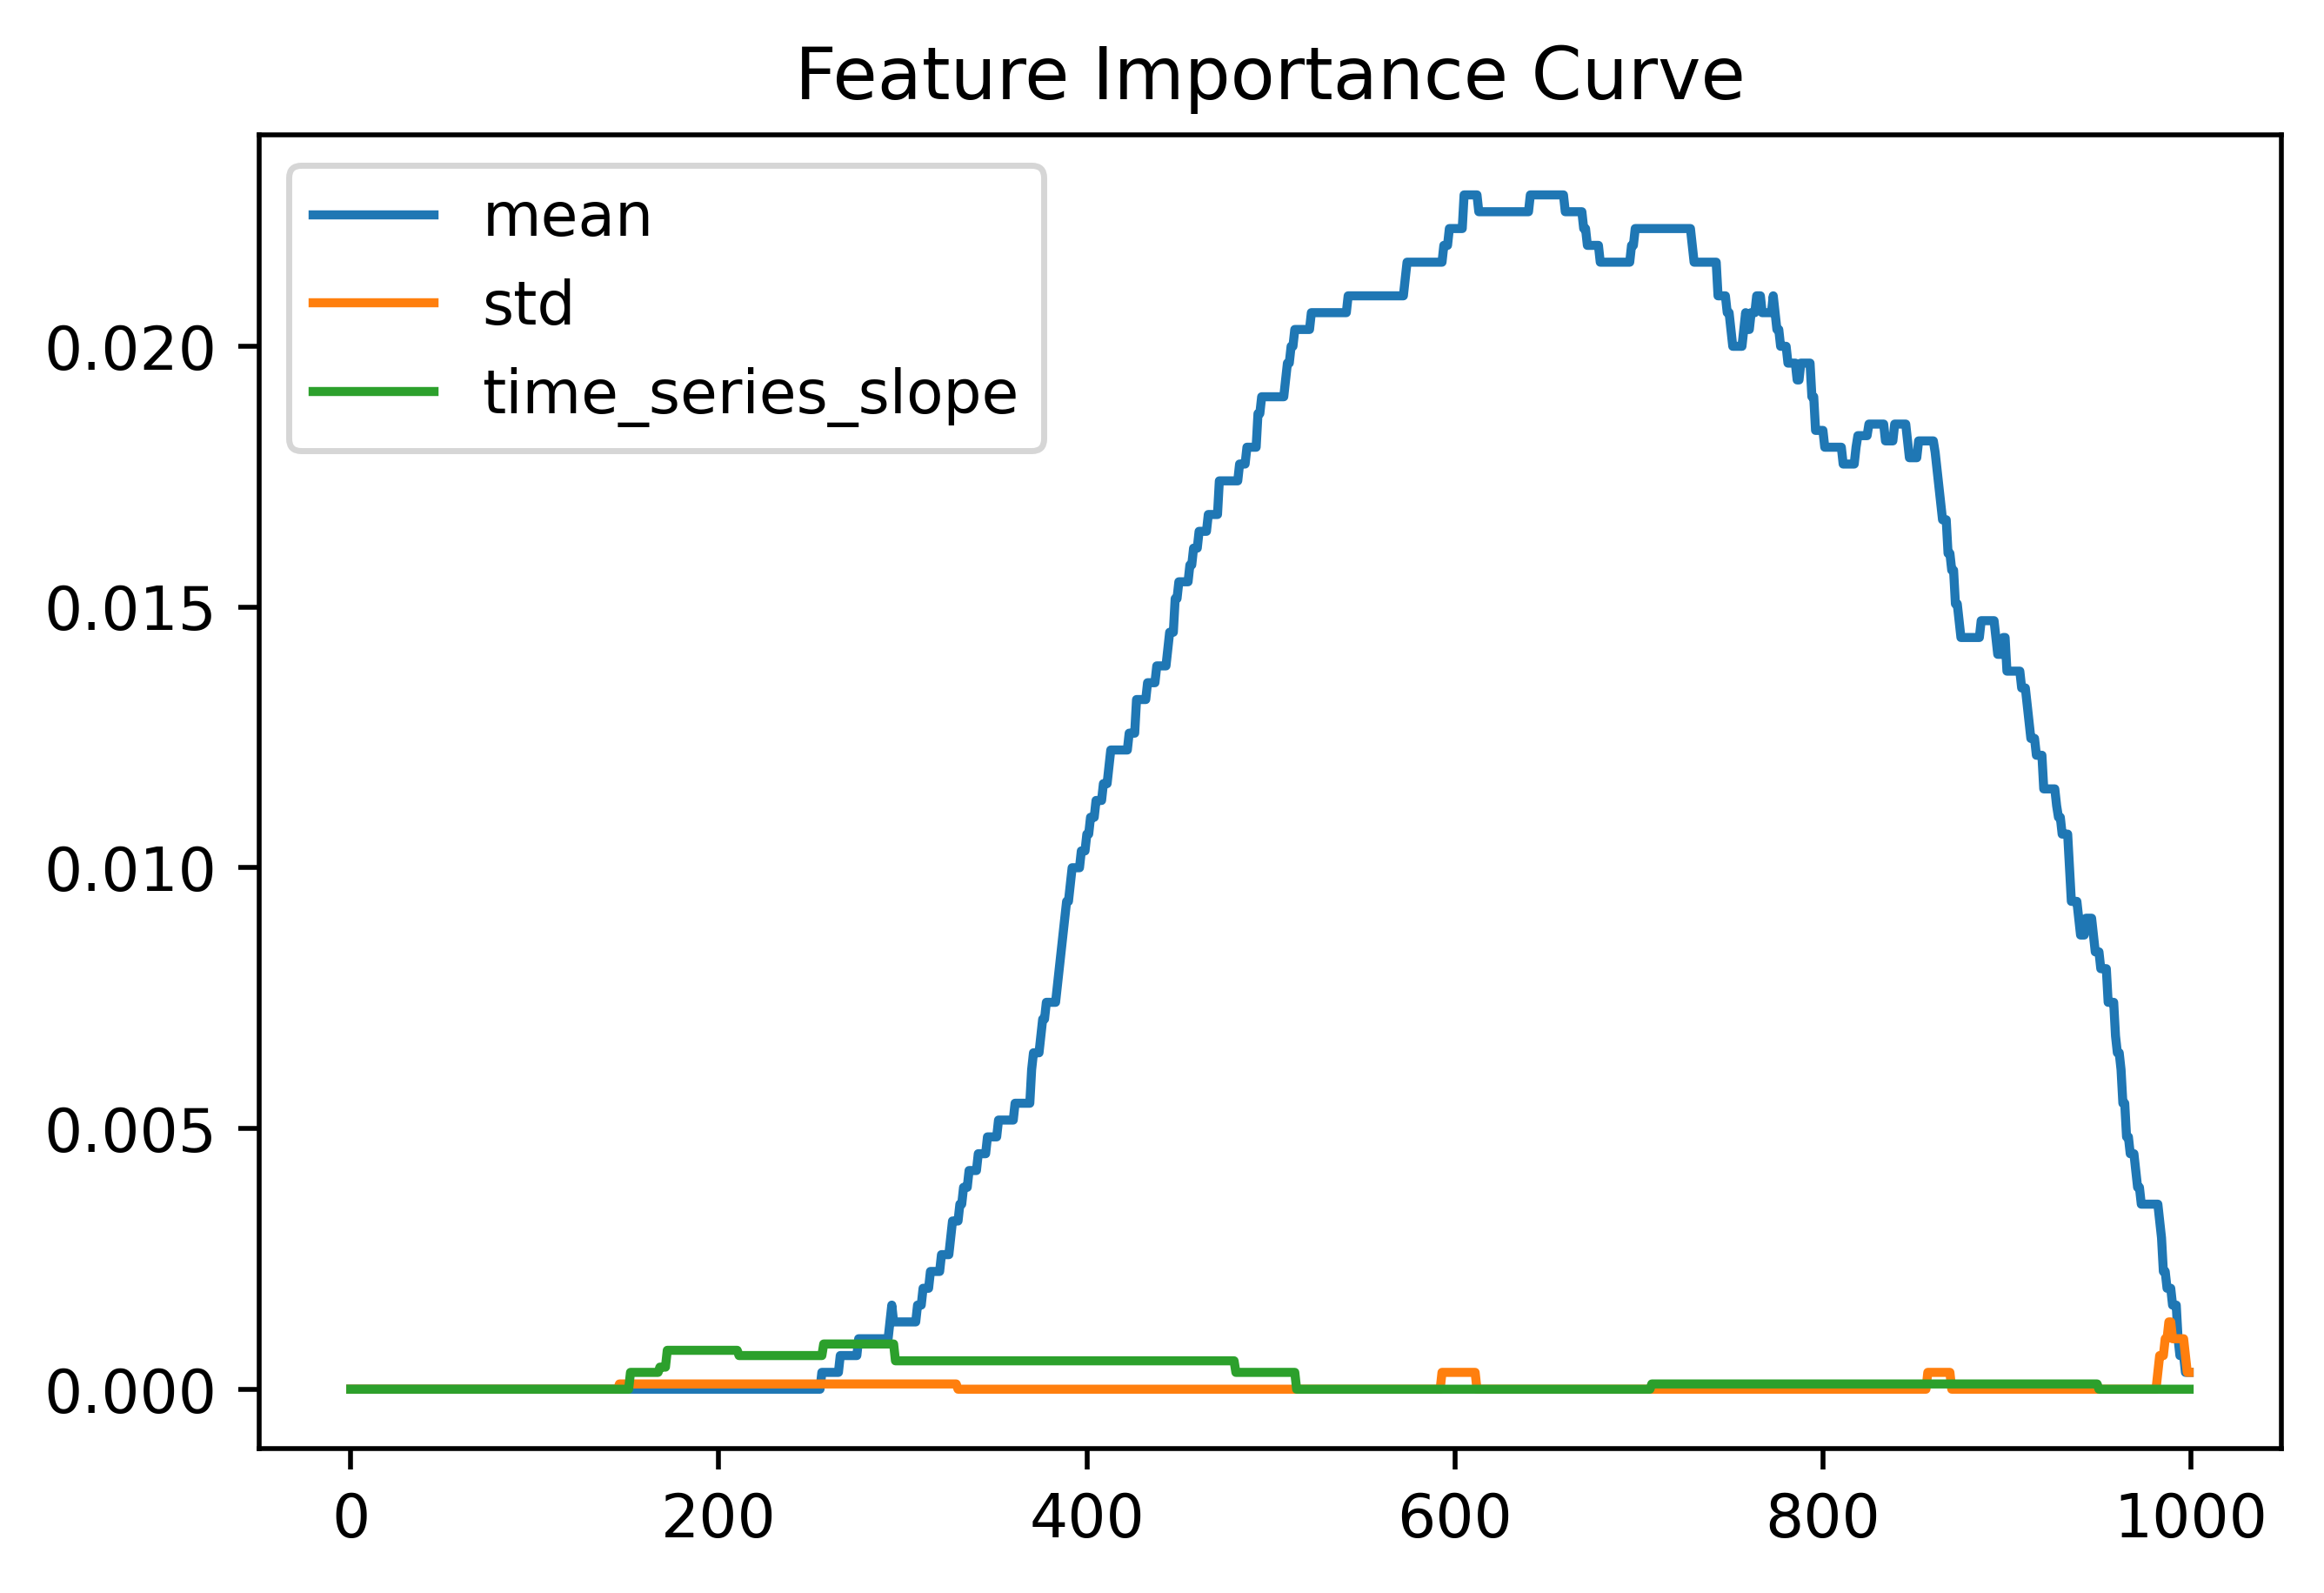

In [2]:
n_samples = 3
X, y = create_data_for_sktime(n_samples)
n_experiments = 10

#time series concatenation
steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", TimeSeriesForestClassifier(n_estimators=100)),
]
clf_concat = Pipeline(steps)
#column ensembling
est = [
        ("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),
        ("TSF1", TimeSeriesForestClassifier(n_estimators=100), [1]),
    ]
clf_ens = ColumnEnsembleClassifier(estimators=est)
    

scores = {'concat':np.empty(n_experiments), 'ens':np.empty(n_experiments)}
for i in range(n_experiments):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.75)
    clf_concat.fit(X_train, y_train)
    scores['concat'][i] = clf_concat.score(X_test, y_test)
    clf_ens.fit(X_train, y_train)
    scores['ens'][i] = clf_ens.score(X_test, y_test)
    

print('Column Concatenation Score:', np.mean(scores['concat']))

print('Column Ensemble Score:', np.mean(scores['ens']))

fig, ax = plt.subplots(dpi=500)
clf_concat.named_steps['classify'].feature_importances_.plot(ax=ax);
ax.set_title('Feature Importance Curve')